In [2]:
from urllib.request import urlopen, Request
import os
import numpy as np        
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from pylab import * 
from osgeo import gdal
import csv 
from PIL import Image
import seaborn as sns
from urllib import request
from bs4 import BeautifulSoup
import mechanicalsoup
from lxml import etree
import json
import requests   
from bs4 import BeautifulSoup   
from webscrapping_fonctions import scrap_html, reseau_sociaux, serveur     
import time                               

# Récupérer les informations sur le serveur

In [ ]:
import sys
spherographia = pd.read_csv('/home/samsarah/Documents/sperografia/csv/SPHEROGRAPHIA_Export_CatalogueGlobe_2023.11.08.csv')
df_url = pd.DataFrame()
frames=[]
for i,j in enumerate(spherographia["Url *"]):
    print(j)

In [ ]:
import sys
spherographia = pd.read_csv('/home/samsarah/Documents/sperografia/csv/SPHEROGRAPHIA_Export_CatalogueGlobe_2023.11.08.csv')
df_url = pd.DataFrame()
frames=[]
for i,j in enumerate(spherographia["Url *"]):
    print(f'\r{i}', end ='')
    time.sleep(0.01)
    df_url_i = serveur(spherographia["Url *"][i])
    if not df_url_i.empty:
        frames.append(df_url_i)
        df_serveur = pd.concat(frames)

In [ ]:
df_serveur.to_csv('/home/samsarah/Documents/sperografia/df_serveur.csv')

In [3]:
df_serveur = pd.read_csv('/home/samsarah/Documents/sperografia/csv/df_serveur.csv')

# Récupérer des informations sur le html du globe 

In [4]:
spherographia = pd.read_csv('/home/samsarah/Documents/sperografia/csv/SPHEROGRAPHIA_Export_CatalogueGlobe_2023.11.08.csv')

In [ ]:
df_url = pd.DataFrame()
frames=[]
f=[]
for i,j in enumerate(spherographia["Url *"]):
    print(f'\r{i}', end ='')
    time.sleep(0.01)
    df_url_i, df_boutons = scrap_html(spherographia["Url *"][i])
    if not df_url_i.empty:
        frames.append(df_url_i)
        df_scrapping = pd.concat(frames)
        f.append(df_boutons)
        df_bouton = pd.concat(f)

In [5]:
df_scrapping.to_csv('/home/samsarah/Documents/sperografia/csv/df_scrapping.csv')

In [6]:
df_bouton.to_csv('/home/samsarah/Documents/sperografia/csv/df_bouton.csv')

In [7]:
df_bouton = pd.read_csv('/home/samsarah/Documents/sperografia/csv/df_bouton.csv')

In [5]:
df_scrapping = pd.read_csv('/home/samsarah/Documents/sperografia/csv/df_scrapping.csv')

In [8]:
df_scrapping.set_index(pd.Index(range(len(df_scrapping))), inplace=True)
df_bouton.set_index(pd.Index(range(len(df_bouton))), inplace=True)

In [9]:
df_concat = pd.merge(df_serveur, df_scrapping, on = "URL", how ="outer")
df = pd.merge(df_concat, df_bouton, on = "URL", how ="outer")
df.set_index(pd.Index(range(len(df))), inplace=True)

##  Regarder les imports

### Javascripts  

In [79]:
from collections import Counter

bibli_js=[]
for i in df_scrapping["Scripts Javascript"]: 
    c = eval(i)
    for y in c: 
        bibli_js.append((y.split('/'))[-1])

# Connaitre les valeurs uniques 
print(len(df_scrapping["Scripts Javascript"])) # nombre d'utilisateur 

# Connaitre l'occurence de chacune 
count_js = Counter(bibli_js)
integer_dict = {key: int(value) for key, value in count_js.items()}


85


### CSS

In [78]:
from collections import Counter
bibli_css=[]
petite_bibli=[]
for i in df_scrapping["Scripts CSS"]: 
    c = eval(i)
    for y in c: 
        bibli_css.append(((y.split('/'))[-1]))


# Connaitre les valeurs uniques 
print(len(df_scrapping["Scripts CSS"])) # nombre d'utilisateur 

# Connaitre l'occurence de chacune 
count_css = Counter(bibli_css)

85


### Les fonts

In [ ]:
from collections import Counter
fonts=[]
petite_bibli=[]

for i in df_scrapping["Liens vers font"]: 
    c = eval(i)
    for y in c: 
        g = (y.split('/')[-1]).replace("css?family=", "")   
        d = g.replace("css2?family=", "")   
        e = d.split(':')[0]
        print(e)
        fonts.append(e)
       
# Connaitre les valeurs uniques 
#print(len(df_scrapping["Liens vers font"])) # nombre d'utilisateur 

# Connaitre l'occurence de chacune 
fontsL = Counter(fonts)
print(fontsL)

### Les langues

In [ ]:
from collections import Counter
langues=[]
petite_bibli=[]

for x, i in enumerate(df_scrapping["Langues"]): 
    c = eval(i)
    for y in c:
        langues.append(str(y))

# Connaitre l'occurence de chacune 
languess = Counter(langues)
print(languess)

## Faire des plots

### Exemples

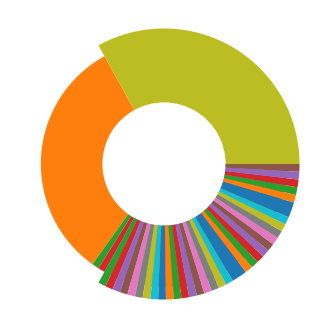

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

# Pie 1
wedges, texts = ax.pie(count_js.values(), radius=1)

for w in wedges:
    w.set_width(.5)

wedges[0].set_visible(False)

# Pie 2
wedges1, texts1 = ax.pie(count_js.values(), radius=1.1)

for w in wedges1:
    w.set_width(.6)

wedges1[1].set_visible(False)
wedges1[2].set_visible(False)
wedges1[3].set_visible(False)

plt.show()

### CSS 

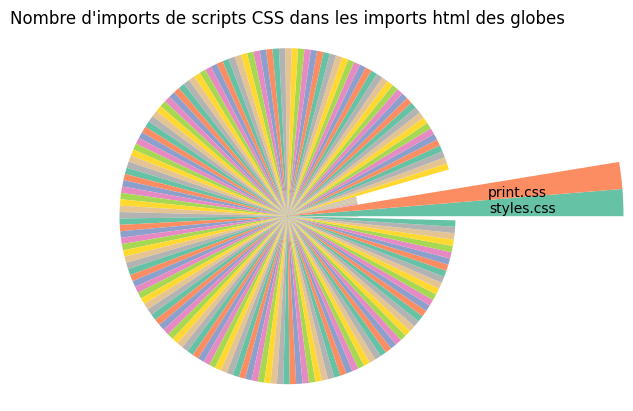

In [359]:
import matplotlib.pyplot as plt

# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in count_css.items()} # on transforme les valeurs de notre dictionnaire en integer
labels = integer_dict.keys() # on extrait les labels
size = list(integer_dict.values()) # les valeurs qu'il faut mettre sous forme de liste pour ax.pie

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(size, labels = labels, labeldistance=1.2, colors = sns.color_palette('Set2')) 

# Hide labels for wedges below the threshold
valeur_seuil = 70 / 100 * max((list(integer_dict.values())))  # valeur seuil d'affichage des étiquettes à 50 % de la valeur maximale
for i, (size, text) in enumerate(zip(size, texts)):
    if size < valeur_seuil:  # si la taille ne permet pas l'affichage
        text.set_text('') # on n'affiche pas 


# Set individual radii for each wedge
for i, wedge in enumerate(wedges):
    if int(list(integer_dict.values())[i]) < 20 / 100 * max((list(integer_dict.values()))): # si la valeur en cours est < à 20% de la valeur max 
        radius = 20 / 100 * max((list(integer_dict.values()))) # elle est fixée à 20% de la valeur max
        wedge.set_radius(radius / 17) # on divise par 10 le rayon pour réduire la taille de la figure
    else: 
        wedge.set_radius(int(list(integer_dict.values())[i] / 17)) # si la valeur en cours est supérieur à 20% la valeur max, on divise par 10 pour garder les mêmes proportions

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title("Nombre d'imports de scripts CSS dans les imports html des globes", loc='center')
plt.show()

### JAVASCRIPTS

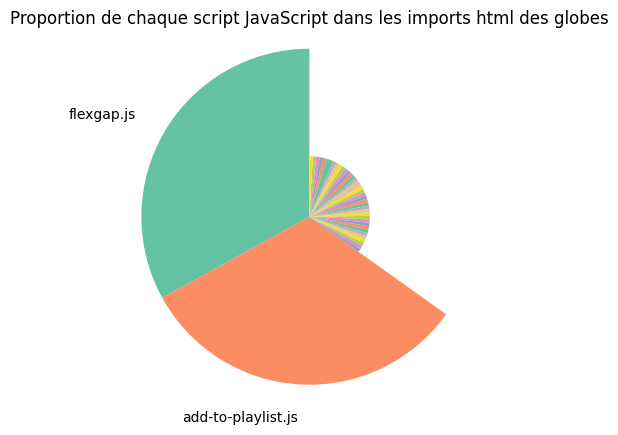

In [215]:
import matplotlib.pyplot as plt

# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in count_js.items()}
labels = integer_dict.keys()
size = list(integer_dict.values())

valeur_seuil = 50 / 100 * max((list(integer_dict.values())))  # ici à 50 % de la valeur maximale
# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(size, startangle=90, labels = labels, labeldistance=1.2, colors = sns.color_palette('Set2'))


# Set individual radii for each wedge
for i, wedge in enumerate(wedges):
    if int(list(integer_dict.values())[i]) < 20 / 100 * max((list(integer_dict.values()))):
        radius = 30 / 100 * max((list(integer_dict.values())))
        wedge.set_radius(radius / 30)
    else: 
        wedge.set_radius(int(list(integer_dict.values())[i] /30))

# Hide labels for wedges below the threshold
for i, (size, label) in enumerate(zip(size, labels)):
    if size < valeur_seuil:
        texts[i].set_text('') 

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title("Proportion de chaque script JavaScript dans les imports html des globes", loc='center')
plt.show()

### Fonts

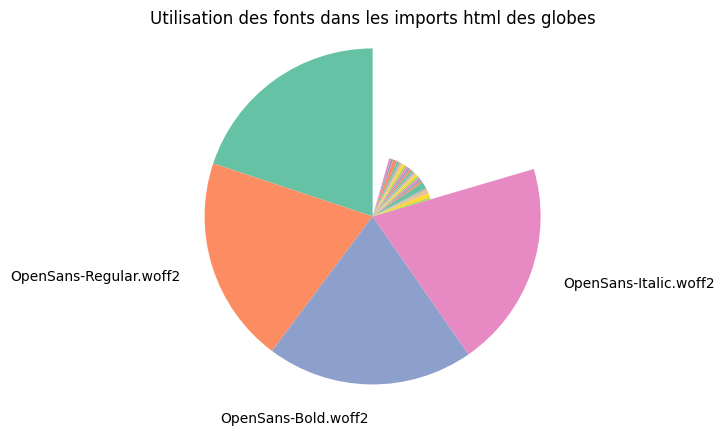

In [299]:
import matplotlib.pyplot as plt

# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in fontsL.items()}
labels = integer_dict.keys()
size = list(integer_dict.values())

valeur_seuil = 50 / 100 * max((list(integer_dict.values())))  # ici à 50 % de la valeur maximale
# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(size, startangle=90, labels = labels, labeldistance=1.2, colors = sns.color_palette('Set2'))


# Set individual radii for each wedge
for i, wedge in enumerate(wedges):
    if int(list(integer_dict.values())[i]) < 20 / 100 * max((list(integer_dict.values()))):
        radius = 30 / 100 * max((list(integer_dict.values())))
        wedge.set_radius(radius / 30)
    else: 
        wedge.set_radius(int(list(integer_dict.values())[i] /30))

# Hide labels for wedges below the threshold
for i, (size, label) in enumerate(zip(size, labels)):
    if size < valeur_seuil:
        texts[i].set_text('') 

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title("Utilisation des fonts dans les imports html des globes", loc='center')
plt.show()

## Boutons

In [10]:
classe=[]
import itertools
from collections import Counter
for i in df_bouton["class"]: 
    if i is not nan:
        merged = list(itertools.chain(*i))
        for y in merged: 
            classe.append(y)
       
# Connaitre l'occurence de chacune 
classe_boutons = Counter(classe)

In [ ]:
aria_controls=[]
import itertools
from collections import Counter
for i in df_bouton["aria-controls"]: 
    if i is not nan:
        for y in i:
            print(y)
            aria_controls.append(y)
# Connaitre l'occurence de chacune 
aria_controlss = Counter(aria_controls)

In [12]:
data_actions=[]
import itertools
from collections import Counter
for i in df_bouton["data-action"]: 
    if i is not nan:
        for y in i:
            data_actions.append(y)
# Connaitre l'occurence de chacune 
data_actionss = Counter(data_actions)

In [13]:
data_bind=[]
import itertools
from collections import Counter
for i in df_bouton["data-bind"]: 
    if i is not nan:
        for y in i:
            data_bind.append(y)
# Connaitre l'occurence de chacune 
data_binds = Counter(data_bind)

In [14]:
aria_label=[]
import itertools
from collections import Counter
for i in df_bouton["aria-label"]: 
    if i is not nan:
        for y in i:
            aria_label.append(y)
# Connaitre l'occurence de chacune 
aria_labeld = Counter(aria_label)

# Faire des Word Cloud

In [15]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
for i in df_serveur["Ville"]:
    print(str(i))

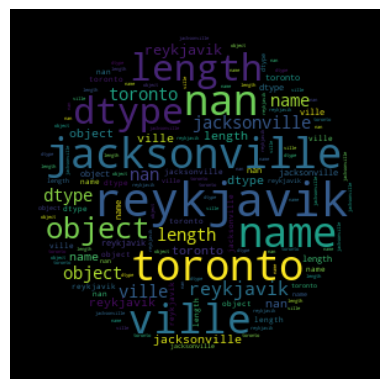

In [39]:
# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = "black",repeat = True,mask = mask).generate(str(df_serveur["Ville"]).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

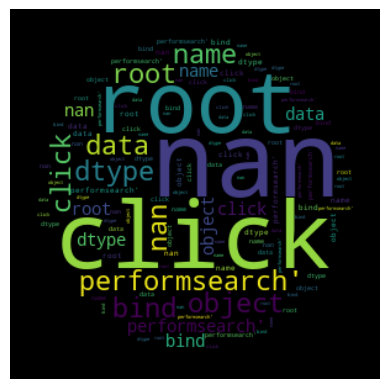

In [24]:
# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(df_bouton["data-bind"]).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

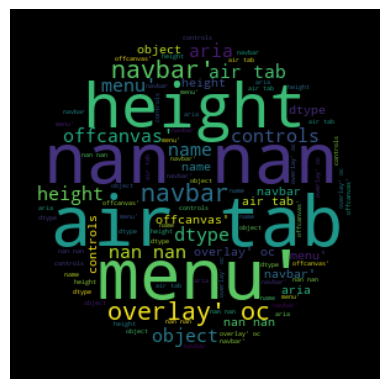

In [27]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(df_bouton['aria-controls']).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

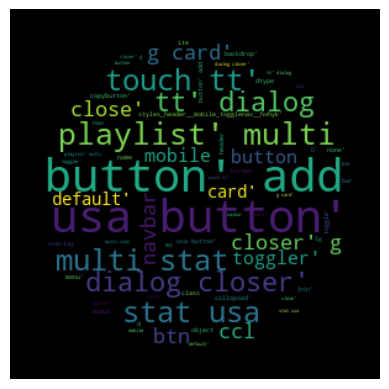

In [30]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(df_bouton['class']).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

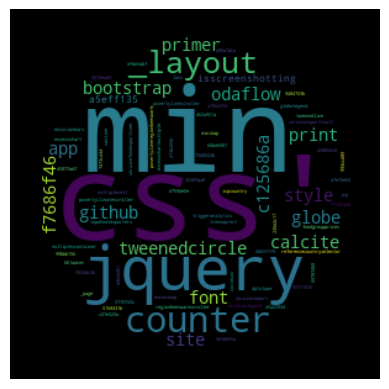

In [80]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(count_css).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

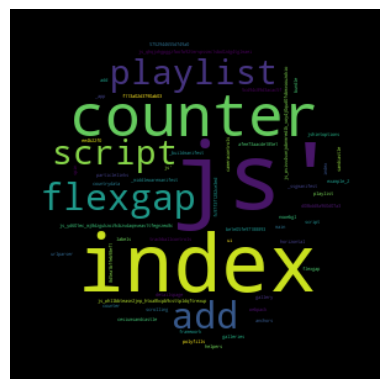

In [85]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(count_js).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

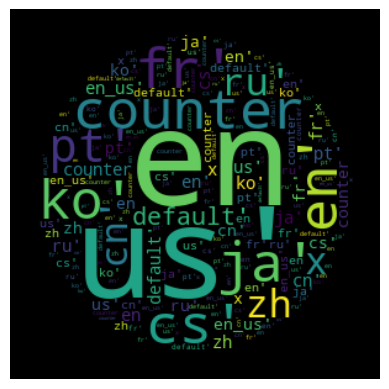

In [83]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(languess).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

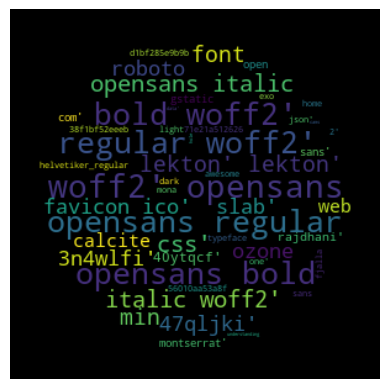

In [84]:
# Create and generate a word cloud image:
wordcloud = WordCloud(repeat = True,mask = mask).generate(str(fonts).lower())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Barres
La fréquence des appels à ces fonctions normale ou pas ? Si une librairie est appelée 10 fois, est ce que c'est au dessus de la moyenne ?

### CSS

<BarContainer object of 6 artists>

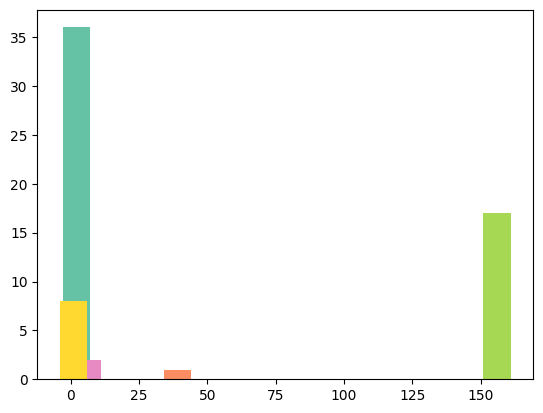

In [353]:
# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in count_css.items()}
labels = integer_dict.keys()
size = list(integer_dict.values())
pop_librairie = Counter(size) # size est le nombre de fois où une librarie est appelée 
#pop_librairie montre si bcp de librarie sont appelé plusieurs fois (si beaucoup de 1 = beaucoup sont très peu populaire)
# 17 : 156 veut dire que 156 librairies ont été appelées 17 fois 
matplotlib.pyplot.bar(list(pop_librairie.values()), list(pop_librairie.keys()), width=10, color = sns.color_palette('Set2'))

### JAVASCRIPT

<BarContainer object of 4 artists>

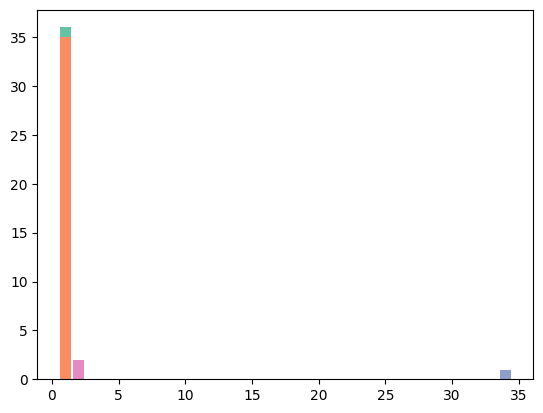

In [364]:
# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in count_js.items()}
labels = integer_dict.keys()
size = list(integer_dict.values())
pop_librairie = Counter(size) # size est le nombre de fois où une librarie est appelée 
#pop_librairie montre si bcp de librarie sont appelé plusieurs fois (si beaucoup de 1 = beaucoup sont très peu populaire)
# 17 : 156 veut dire que 156 librairies ont été appelées 17 fois 
matplotlib.pyplot.bar(list(pop_librairie.values()), list(pop_librairie.keys()), width=0.8, color = sns.color_palette('Set2'))

### FONTS

<BarContainer object of 5 artists>

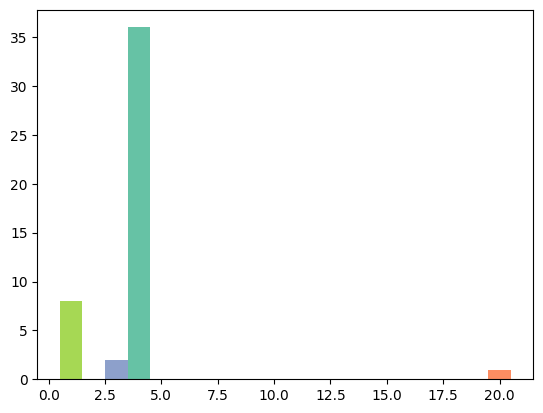

In [362]:
# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in fontsL.items()}
labels = integer_dict.keys()
size = list(integer_dict.values())
pop_librairie = Counter(size) # size est le nombre de fois où une librarie est appelée 
#pop_librairie montre si bcp de librarie sont appelé plusieurs fois (si beaucoup de 1 = beaucoup sont très peu populaire)
# 17 : 156 veut dire que 156 librairies ont été appelées 17 fois 
matplotlib.pyplot.bar(list(pop_librairie.values()), list(pop_librairie.keys()), width=1, color = sns.color_palette('Set2'))

## Sur facebook, youtube, linkedin, github ou instagram ? 

In [10]:
nbre_globe_fb = len(df_scrapping["Facebook"]) - df_scrapping["Facebook"].isnull().sum() # on a des globes en double qui renverront le même facebook, si on compte les valeurs uniques la proportion sera fausse
nbre_globe_insta = len(df_scrapping["Instagram"]) - df_scrapping["Instagram"].isnull().sum()
nbre_globe_tw = len(df_scrapping["twitter"]) - df_scrapping["twitter"].isnull().sum()
nbre_globe_ld = len(df_scrapping["Linkedin"]) - df_scrapping["Linkedin"].isnull().sum()
nbre_globe_git = len(df_scrapping["Github"]) - df_scrapping["Github"].isnull().sum()

Text(0.5, 1.0, 'Présence sur les réseaux sociaux des globes de Sphérographia')

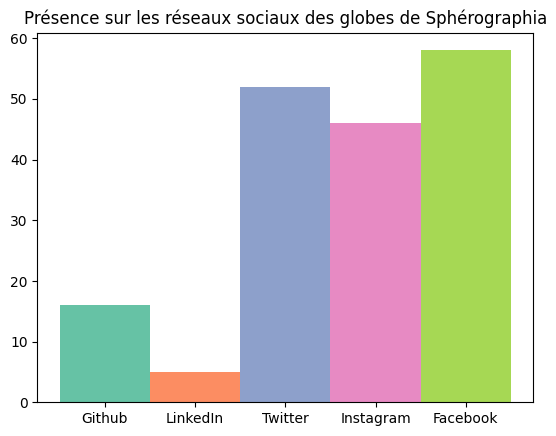

In [197]:
globe_sur_reseau = {"Github":nbre_globe_git, "LinkedIn":nbre_globe_ld, "Twitter":nbre_globe_tw, "Instagram":nbre_globe_insta, "Facebook":nbre_globe_fb}
# Data for the pie chart
# Convert values to integers
integer_dict = {key: int(value) for key, value in globe_sur_reseau.items()}
matplotlib.pyplot.bar(list(integer_dict.keys()), list(integer_dict.values()), width=1, color = sns.color_palette('Set2'))
plt.title("Présence sur les réseaux sociaux des globes de Sphérographia")

# Faire des graphiques en fonction de la date 

Mettre les date en date time et en index

In [ ]:
from datetime import datetime
from ast import literal_eval

for i, date in enumerate(df["Date de création"]):
    try :
        if str(date) != datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d %H:%M:%S"):
          df.at[i,"Date de création"] = date
    except:
        try:
            df.at[i, "Date de création"] = date[0]
            #df["Date de création"][i] = date[0]
        except: 
            print("Cette date est None")
           
#df['Date de création'] = pd.to_datetime(df['Date de création'])

In [ ]:
from datetime import datetime
from ast import literal_eval

for i, date in enumerate(df["Date d'expiration"]):
    try :
        if str(date) != datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d %H:%M:%S"):
          df.at[i,"Date d'expiration"] = date
    except:
        try:
            df.at[i, "Date d'expiration"] = date[0]
            #df["Date d'expiration"][i] = date[0]
        except: 
            print("Cette date est None")
           
df["Date d'expiration"] = pd.to_datetime(df["Date d'expiration"])

In [ ]:
from datetime import date
df["Date_creation"] = 0
for i, y in enumerate(df['Date de création']):
    if  len(str(y)) > 7:
        df["Date_creation"][i] = y[0:7] 
    else: 
        df["Date_creation"][i] = date(1980, 1, 1)

In [246]:
df["Date_creation"] = pd.to_datetime(df["Date_creation"])

In [247]:
df.set_index(["Date_creation", "Date d'expiration", 'URL'], inplace=True)

## Nombre de langues et date

In [ ]:
df['Nombre de langues'] = ""
for i, lang in enumerate(df["Langues"]):
    try : 
        df["Nombre de langues"][i] = int(len(lang))
    except: 
        df["Nombre de langues"][i] = 0
        print("Il n'y a pas de langue")

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
g = sns.relplot(data=df, x='Date_creation', y='Nombre de langues',  size='Nombre de langues', height=8.27, aspect=11.7/8.27, hue = "Nombre de langues",sizes=(50, 200),
                legend=True)
sns.despine(left=True, bottom=True)
#g.set_xticklabels(rotation=90)
plt.xlabel("")
plt.ylabel("")

for item, ax in g.axes_dict.items():
    ax.grid(False, axis='x')
    ax.grid(axis="y", linewidth=3, alpha=0.5)
    ax.grid(axis="x", linewidth=0.5, alpha=0.5)
    ax.tick_params(axis='both', which='both', length=0, labelcolor="#00000077")
    #ax.xaxis.set_ticks_position("top")

    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_title(item, size=10)  # or ax.set_title('') to remove the title entirely

## Nombre de fonctionnalités et date

In [ ]:
df["Nombre de classe"] = 0
for i, date in enumerate(df["class"]):
    try:
        df["Nombre de classe"][i] = len(date)
    except: 
        print("Il n'y a pas de classe")

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
g = sns.relplot(data=df, x='Date_creation', y='Nombre de classe',  size='Nombre de classe', height=8.27, aspect=11.7/8.27, hue = "Nombre de classe",sizes=(50, 200),
                
                legend=True)
sns.despine(left=True, bottom=True)
#g.set_xticklabels(rotation=90)
plt.xlabel("")
plt.ylabel("")

for item, ax in g.axes_dict.items():
    ax.grid(False, axis='x')
    ax.grid(axis="y", linewidth=3, alpha=0.5)
    ax.grid(axis="x", linewidth=0.5, alpha=0.5)
    ax.tick_params(axis='both', which='both', length=0, labelcolor="#00000077")
    #ax.xaxis.set_ticks_position("top")
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_title(item, size=10)  # or ax.set_title('') to remove the title entirely

## Date et ville

In [87]:
c = df['Ville']

In [89]:
c.to_csv('/home/samsarah/Documents/sperografia/csv/c.csv')

In [ ]:
from datetime import datetime
from ast import literal_eval

for i, ville in enumerate(df["Ville"]):
    if ville != None:
        print("")
    if isinstance(ville, list):
        df.at[i, "Ville"] = ville[-1]


/home/samsarah/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/samsarah/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/samsarah/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/samsarah/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

Text(-295.80555555555554, 0.5, '')

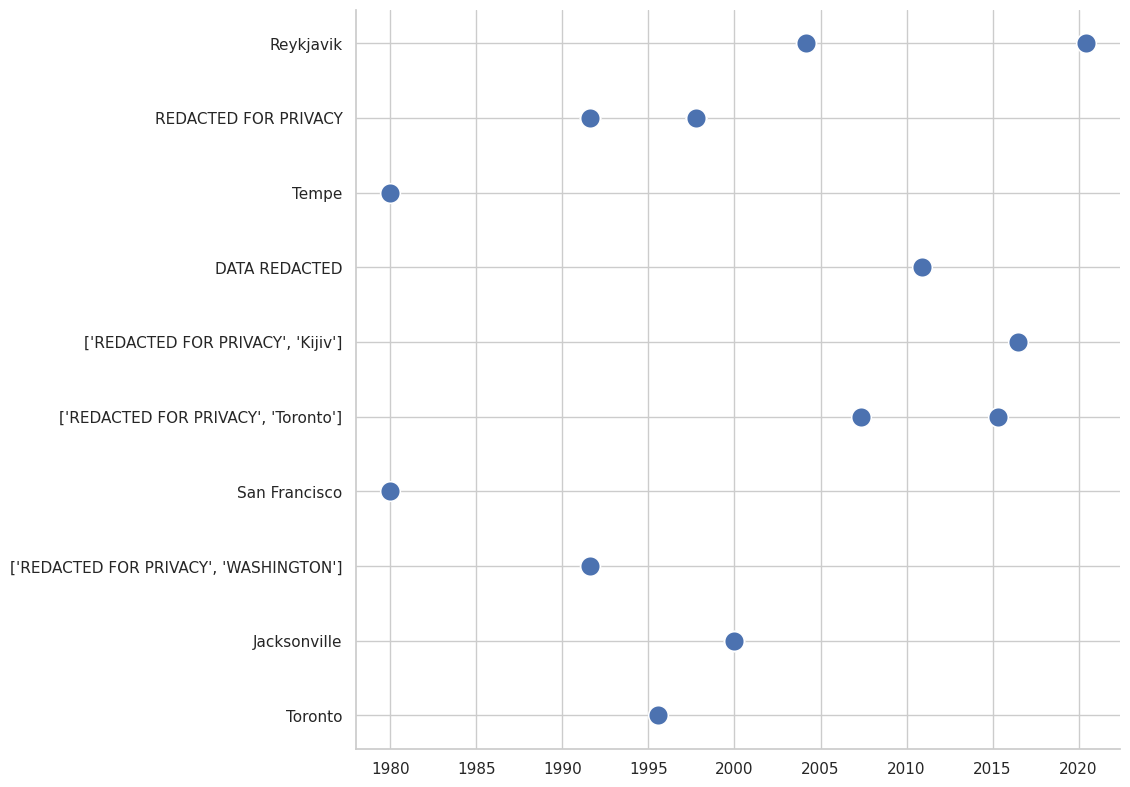

In [233]:
import seaborn as sns
sns.set_style("whitegrid")
g = sns.relplot(data=df, x='Date_creation', y='Ville', height=8.27, aspect=11.7/8.27, s=200)
#sns.despine(left=True, bottom=True)
#g.set_xticklabels(rotation=90)
plt.xlabel("")
plt.ylabel("")

## Date et réseaux sociaux 

faire plusieurs plots

# Corrélations

Facebook et Google analytics

LinkedIn et Google Analytics

Nombre de fonctionnalités et le nombre de langues

# Table de contingence

<Axes: xlabel='GoogleTagManager', ylabel='Nombre de langues'>

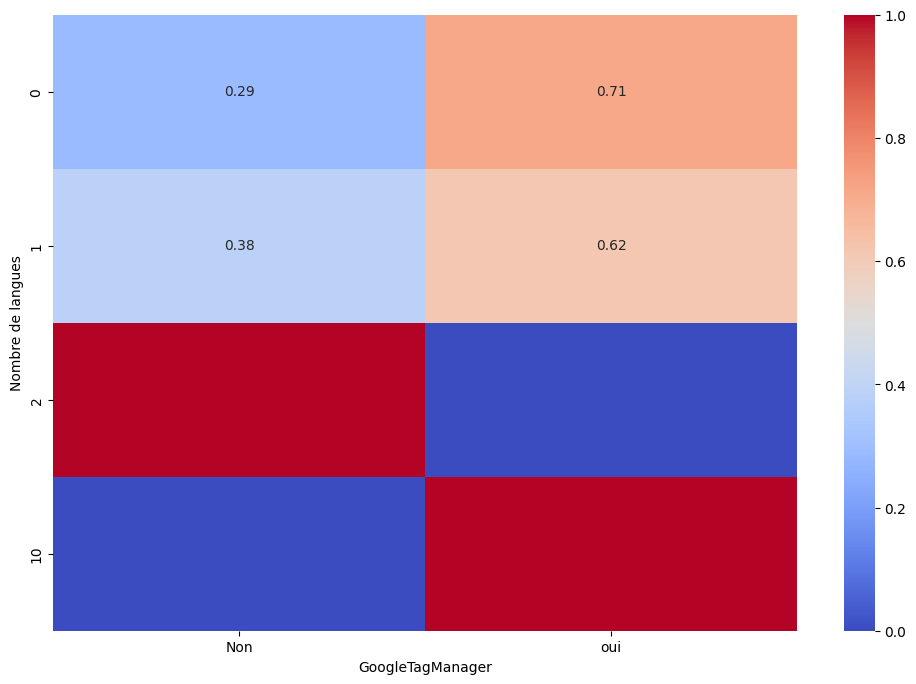

In [73]:
contigency_pct = pd.crosstab(df['Nombre de langues'], df['GoogleTagManager'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')

<Axes: xlabel='GoogleTagManager', ylabel='Nombre de classe'>

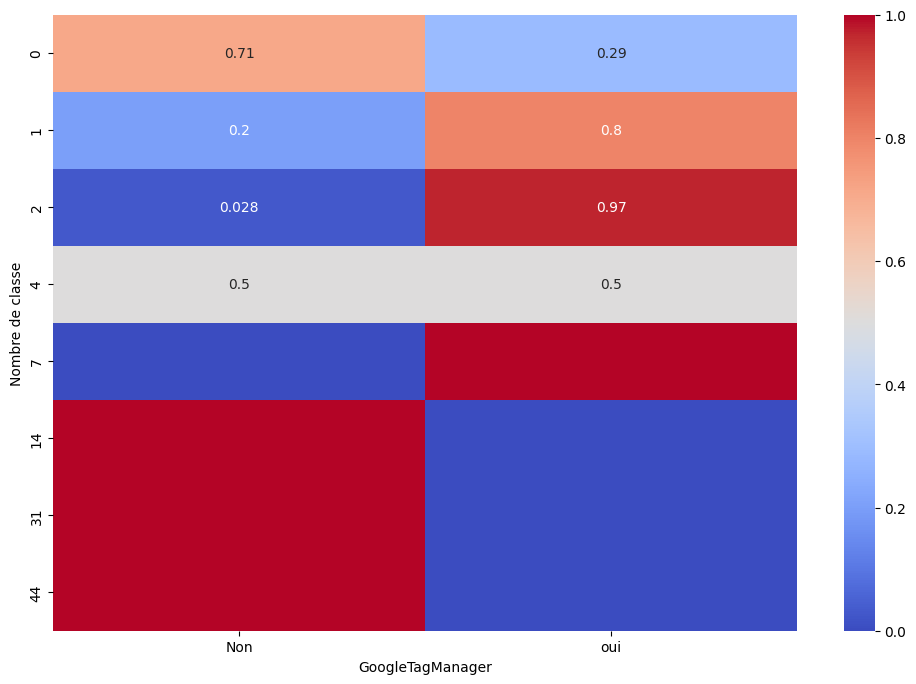

In [71]:
contigency= pd.crosstab(df['Nombre de classe'],df['Nombre de langues']) 
contigency_pct = pd.crosstab(df['Nombre de classe'], df['GoogleTagManager'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')

<Axes: xlabel='Nombre de langues', ylabel='Nombre de classe'>

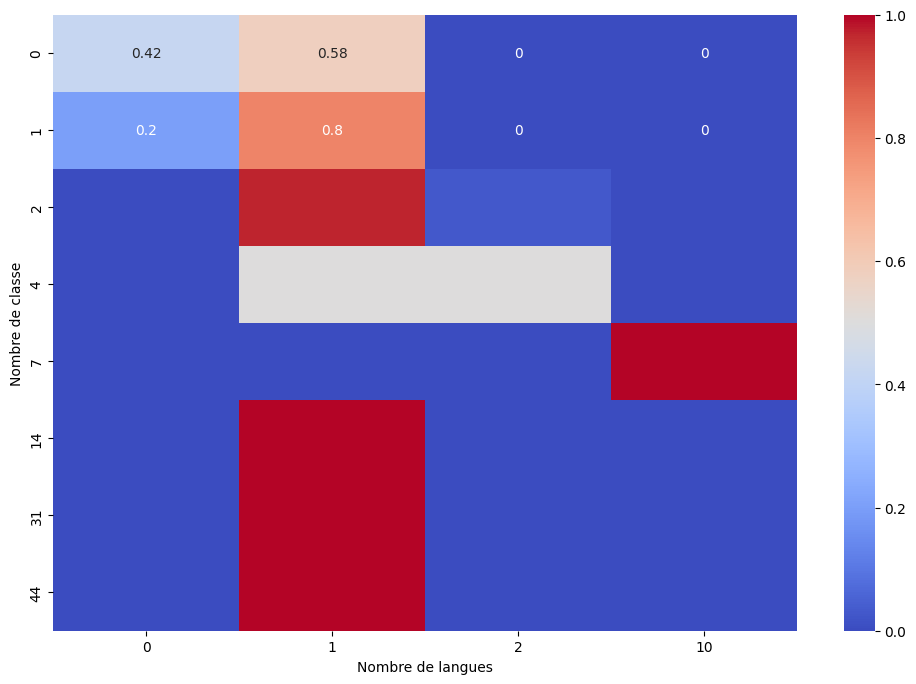

In [69]:
contigency= pd.crosstab(df['Nombre de classe'],df['Nombre de langues']) 
contigency_pct = pd.crosstab(df['Nombre de classe'], df['Nombre de langues'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')

In [282]:
index = pd.Index(range(0, 85, 1))
df_scrapping.set_index(index, inplace=True)

In [ ]:
df["I"] = 0 
df["g"] = 0 
df['t'] = 0
df['l'] = 0
df['f'] = 0

for i,y in enumerate(df['Facebook']):
    if "facebook" in str(df['Facebook'][i]):
        df["f"][i] = 1
    else: 
        df["f"][i] = 0
    if "instagram" in str(df['Instagram'][i]):
            df["I"][i] = 1
    else: 
        df["I"][i] = 0

    if "github" in str(df['Github'][i]):
        df["g"][i] = 1
    else: 
        df["g"][i] = 0
    if "twitter" in str(df['twitter'][i]):
        df["t"][i] = 1
    else: 
        df["t"][i] = 0
    if "linkedin" in str(df['Linkedin'][i]):
        df["l"][i] = 1
    else: 
        df["l"][i] = 0

[Text(0.5, 58.7222222222222, 'Instagram'),
 Text(120.72222222222221, 0.5, 'Facebook')]

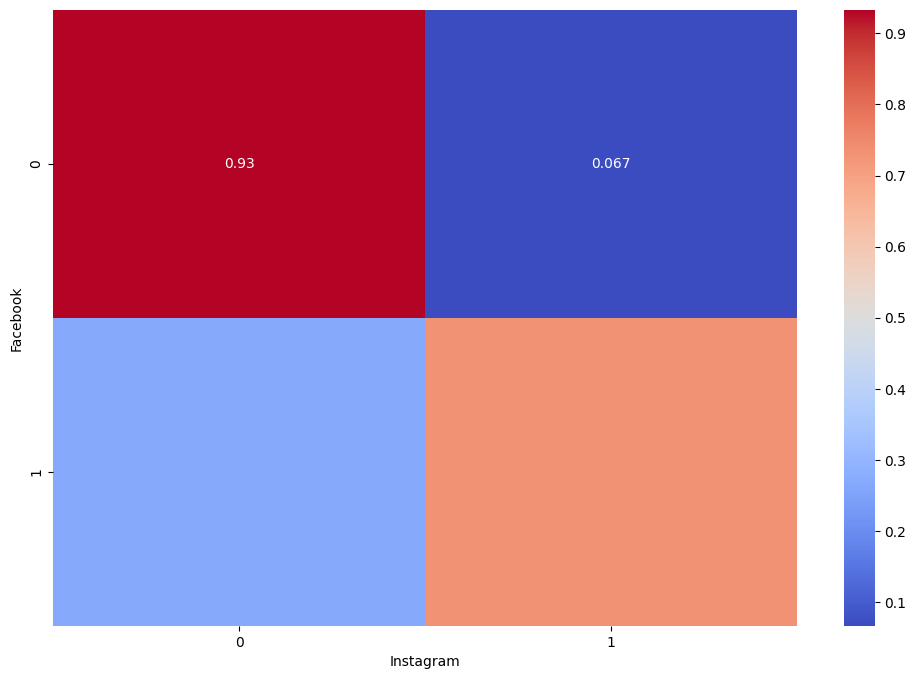

In [63]:
contigency= pd.crosstab(df['f'],df['I']) 
contigency_pct = pd.crosstab(df['f'], df['I'], normalize='index')
plt.figure(figsize=(12,8))
s = sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')
s.set(xlabel='Instagram', ylabel='Facebook')

[Text(0.5, 58.7222222222222, 'Github'),
 Text(120.72222222222221, 0.5, 'Facebook')]

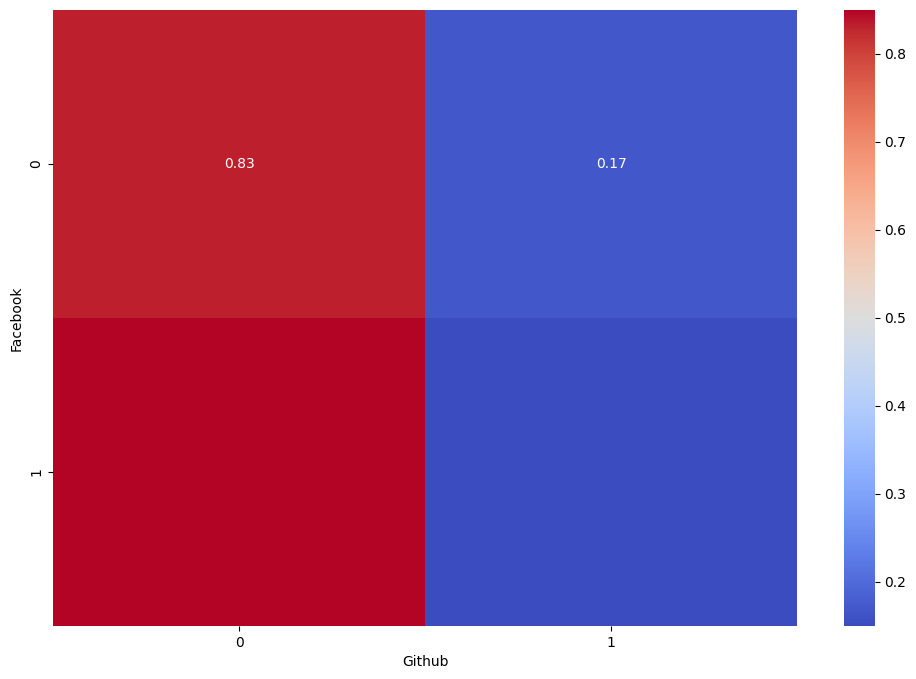

In [62]:
contigency= pd.crosstab(df['f'],df['g']) 
contigency_pct = pd.crosstab(df['f'], df['g'], normalize='index')
plt.figure(figsize=(12,8))
s = sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')
s.set(xlabel='Github', ylabel='Facebook')

[Text(0.5, 58.7222222222222, 'Twitter'),
 Text(120.72222222222221, 0.5, 'Facebook')]

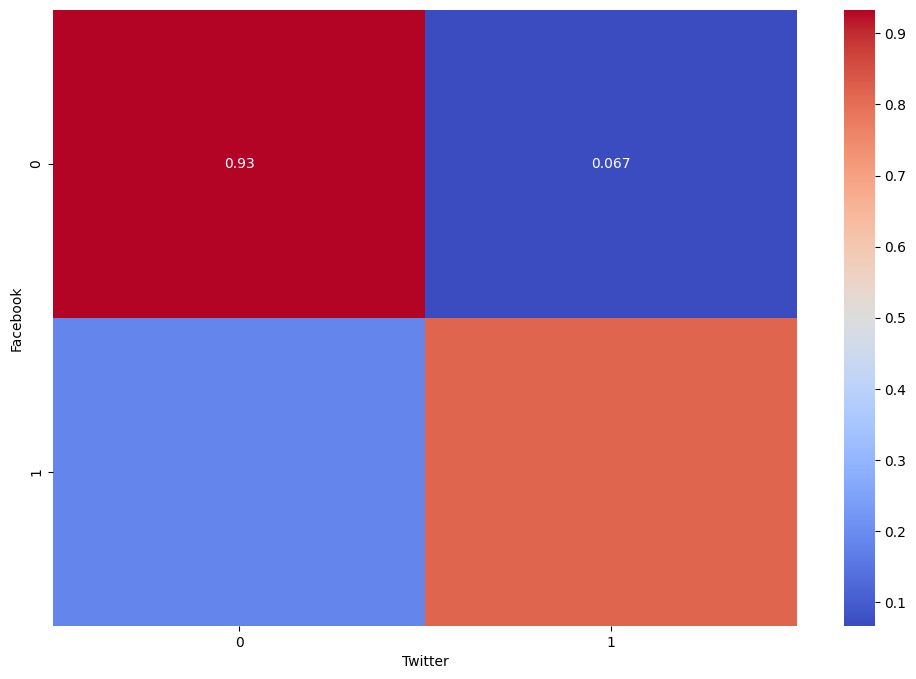

In [64]:
contigency= pd.crosstab(df['f'],df['t']) 
contigency_pct = pd.crosstab(df['f'], df['t'], normalize='index')
plt.figure(figsize=(12,8))
s = sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')
s.set(xlabel='Twitter', ylabel='Facebook')

[Text(0.5, 58.7222222222222, 'LinkedIn'),
 Text(120.72222222222221, 0.5, 'Facebook')]

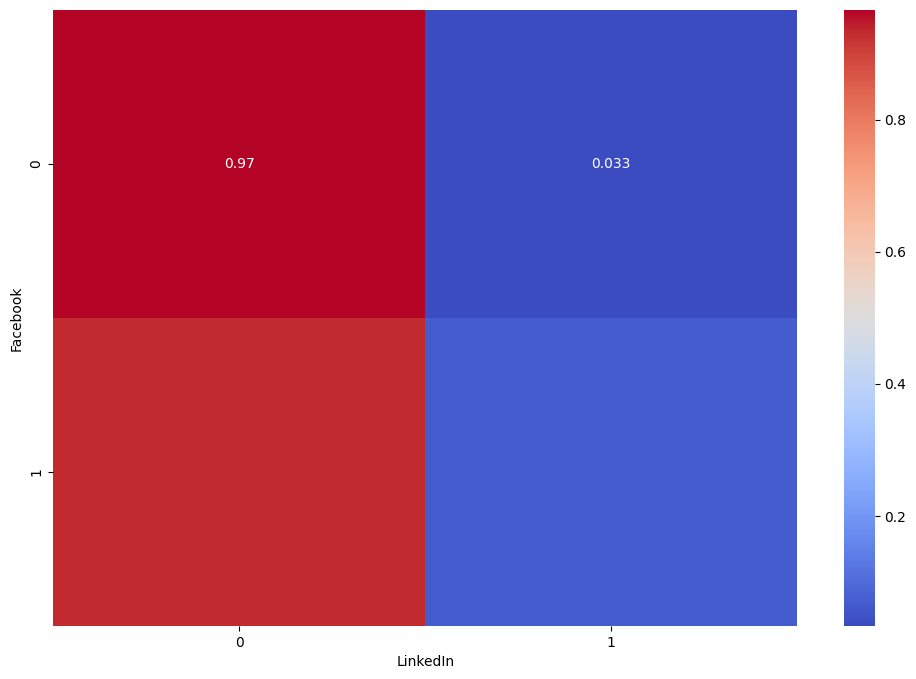

In [58]:
contigency= pd.crosstab(df['f'],df['l']) 
contigency_pct = pd.crosstab(df['f'], df['l'], normalize='index')
plt.figure(figsize=(12,8))
s =sns.heatmap(contigency_pct,annot=True, cmap='coolwarm')
s.set(xlabel='LinkedIn', ylabel='Facebook')

[Text(0.5, 58.7222222222222, 'LinkedIn'),
 Text(120.72222222222221, 0.5, 'Github')]

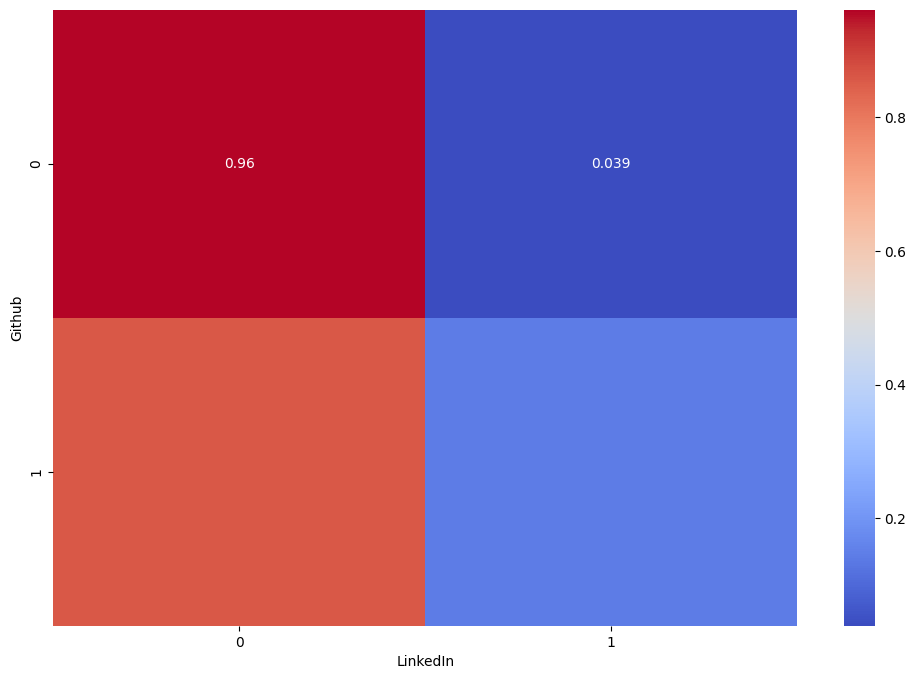

In [56]:
contigency= pd.crosstab(df['g'],df['l']) 
contigency_pct = pd.crosstab(df['g'], df['l'], normalize='index')
plt.figure(figsize=(12,8))
s = sns.heatmap(contigency_pct,annot=True,  cmap='coolwarm')
s.set(xlabel='LinkedIn', ylabel='Github')

[Text(0.5, 58.7222222222222, 'Facebook'),
 Text(120.72222222222221, 0.5, 'GoogleTagManager')]

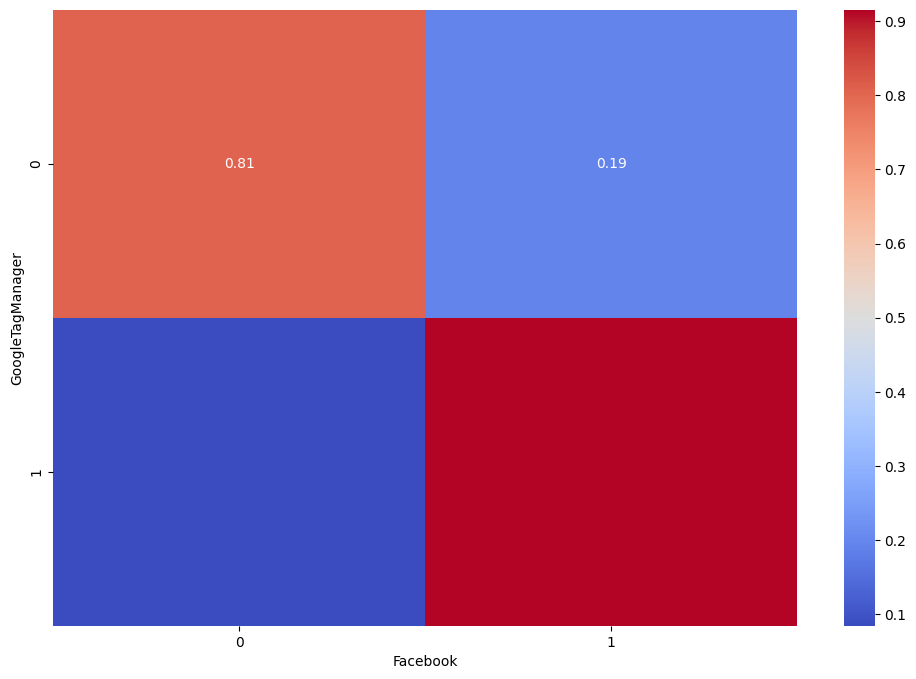

In [53]:
cond1 = df.GoogleTagManager.str.contains('oui')
cond2 = df.GoogleTagManager.str.contains('Non')
df['GoogleTag'] = np.where(cond1, '1', np.where(cond2, '0', '3') )
contigency= pd.crosstab(df['GoogleTag'],df['t']) 
contigency_pct = pd.crosstab(df['GoogleTag'], df['f'], normalize='index')
plt.figure(figsize=(12,8))
s = sns.heatmap(contigency_pct,annot=True,  cmap='coolwarm')
s.set(xlabel='Facebook', ylabel='GoogleTagManager')

# Récupérer des informations sur les réseaux sociaux 

In [ ]:
df_scrapping.set_index(pd.Index(range(len(df_scrapping))), inplace=True)
frames=[]
inst_traite=[]
fb_traite = []

for i in range(len(df_scrapping["Instagram"])): # il manque des https: donc on les rajoute
    if "https:" not in str(df_scrapping["Instagram"][i]) and isinstance(df_scrapping["Instagram"][i], str):
       df_scrapping["Instagram"][i] = "https:" + df_scrapping["Instagram"][i]
    if "https:" not in str(df_scrapping["Facebook"][i]) and isinstance(df_scrapping["Facebook"][i], str):
       df_scrapping["Facebook"][i] = "https:" + df_scrapping["Facebook"][i]
    if str(df_scrapping[["Instagram"][i]]) in str(inst_traite) and str(df_scrapping[["Facebook"][i]]) in str(fb_traite):
        i=+1
    inst_traite.append(str(df_scrapping["Instagram"][i]))
    fb_traite.append(str(df_scrapping["Facebook"][i]))
    df_sortie = reseau_sociaux(df_scrapping["Instagram"][i], df_scrapping["Facebook"][i], df_sortie=pd.DataFrame({}))
    if not df_sortie.empty:
        frames.append(df_sortie)
        df_reseau = pd.concat(frames)

df_reseau.to_csv('/home/samsarah/Documents/sperografia/df_reseau.csv')
df_reseau.set_index(pd.Index(range(len(df_scrapping))), inplace=True)

In [18]:
df_reseau.set_index(pd.Index(range(len(df_reseau))), inplace=True)
df_reseau

,Unnamed: 0,Instagram,Facebook,Followerss,Followingg,Postss,Followers FB,Jaime,En_parle,Pers_ici,Description facebook
0,0,https://www.instagram.com/nullschool/,https://www.facebook.com/EarthWindMap,NaN,NaN,NaN,NaN,185 281 J’aime,1 180 en parlent,NaN,an animated map of global weather conditions:...
1,1,https://www.instagram.com/nullschool/,https://www.facebook.com/EarthWindMap,NaN,NaN,NaN,NaN,185 281 J’aime,1 180 en parlent,NaN,an animated map of global weather conditions:...
2,2,https://www.instagram.com/nullschool/,https://www.facebook.com/EarthWindMap,NaN,NaN,NaN,NaN,185 281 J’aime,1 180 en parlent,NaN,an animated map of global weather conditions:...
3,3,https://www.instagram.com/nullschool/,https://www.facebook.com/EarthWindMap,NaN,NaN,NaN,NaN,185 281 J’aime,1 180 en parlent,NaN,an animated map of global weather conditions:...
4,4,https://www.instagram.com/nullschool/,https://www.facebook.com/EarthWindMap,NaN,NaN,NaN,NaN,185 281 J’aime,1 180 en parlent,NaN,an animated map of global weather conditions:...
...,...,...,...,...,...,...,...,...,...,...,...
80,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82,NaN,https://www.facebook.com/sharer/sharer.php?u=h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,83,NaN,https://www.facebook.com/sharer/sharer.php?u=h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tests pour se connecter avec un login

In [24]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Replace with the path to your webdriver executable (e.g., chromedriver, geckodriver)
driver_path = '/usr/bin/chromedriver'
# Use ChromeOptions to specify the executable path
chrome_options = webdriver.ChromeOptions(webdriver=driver_path)

# Initialize the Chrome driver with ChromeOptions
driver = webdriver.Chrome(options=chrome_options)

try : 
    # Replace this URL with the actual URL you want to scrape
    url = df["Instagram"][5]
    driver.get(url)

    # Assuming there's some login process; you might need to adjust this part
    # Example: Fill in username and password fields if it's a login page
    driver.find_element_by_id('username').send_keys('sarah.wroblewski@outlook.fr')
    driver.find_element_by_id('password').send_keys('motdepasse1!')
    driver.find_element_by_name('login_button').click()
    # Wait for the page to load (you might need to adjust the wait time)
    driver.implicitly_wait(10)

    # Get the page source after login
    html = driver.page_source

    # Now you can use BeautifulSoup to parse the HTML as before
    soup = BeautifulSoup(html, 'html.parser')

finally:
    driver.quit()

TypeError: ChromiumOptions.__init__() got an unexpected keyword argument 'webdriver'